# Correlation and distribution analysis

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt 
import os

Directory and files created after running data_analysis/create_correlation_files.py. The files consists of inc. angle in addition to the summation, minimum and maximum of pixel values for iceberg respectively no iceberg images 

In [2]:
dir = '../data/image_properties/'
iceberg_df = pd.read_csv(os.path.join(dir, 'iceberg.csv'))
no_iceberg_df = pd.read_csv(os.path.join(dir, 'no_iceberg.csv'))

Remove N/A entries! 

In [3]:
no_iceberg_df = no_iceberg_df.drop(no_iceberg_df[(no_iceberg_df.inc_angle == 'na')].index)
no_iceberg_df.head(3)

,Unnamed: 0,inc_angle,sum_band1,min_band1,max_band1,sum_band2,min_band2,max_band2
0,0,34.8374,-71210.973003,-23.874260,13.682014,-131645.521324,-36.830750,7.930523
1,1,43.108,-146654.685276,-39.597107,17.361820,-162833.641451,-39.594185,2.154399
4,4,43.2268,-171213.876359,-43.147549,-8.868231,-174633.946036,-39.625370,-14.519162


## First, lets take a look at some distributions for iceberg images vs. no iceberg images...! 
### INCLINATION ANGLE

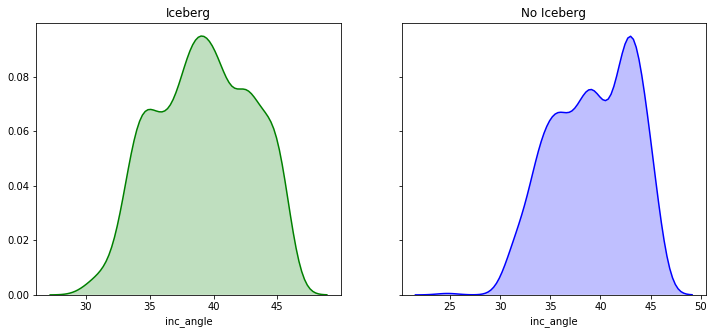

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12,5))

sns.distplot(iceberg_df['inc_angle'], hist=False, color="g", kde_kws={"shade": True}, ax=ax1)
sns.distplot(no_iceberg_df['inc_angle'], hist=False, color="b", kde_kws={"shade": True}, ax=ax2)

ax1.set_title('Iceberg')
ax2.set_title('No Iceberg')

plt.show()

### MIN. PIXEL VALUES

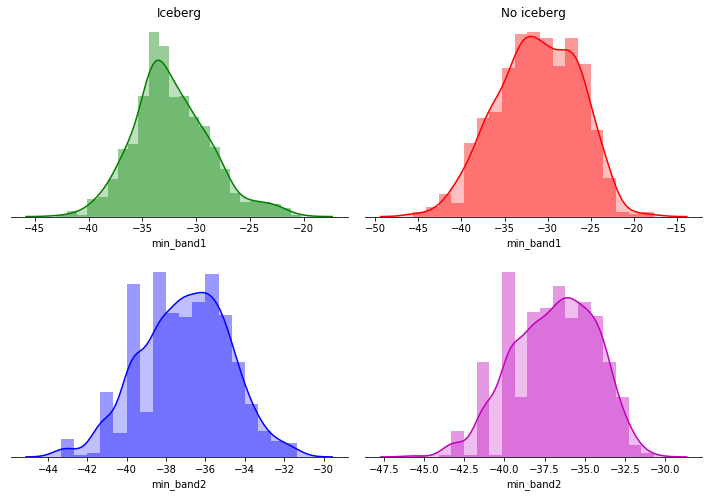

In [14]:
f, axes = plt.subplots(2, 2, figsize=(10, 7))
sns.despine(left=True)

sns.distplot(iceberg_df['min_band1'], kde=True, color="g", kde_kws={"shade": True}, ax=axes[0, 0])
sns.distplot(iceberg_df['min_band2'], kde=True, color="b", kde_kws={"shade": True}, ax=axes[1, 0])
sns.distplot(no_iceberg_df['min_band1'], kde=True, color="r", kde_kws={"shade": True}, ax=axes[0, 1])
sns.distplot(no_iceberg_df['min_band2'], kde=True, color="m", kde_kws={"shade": True}, ax=axes[1, 1])

axes[0,0].set_title('Iceberg')
axes[0,1].set_title('No iceberg')

plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

### MAX. PIXEL VALUES

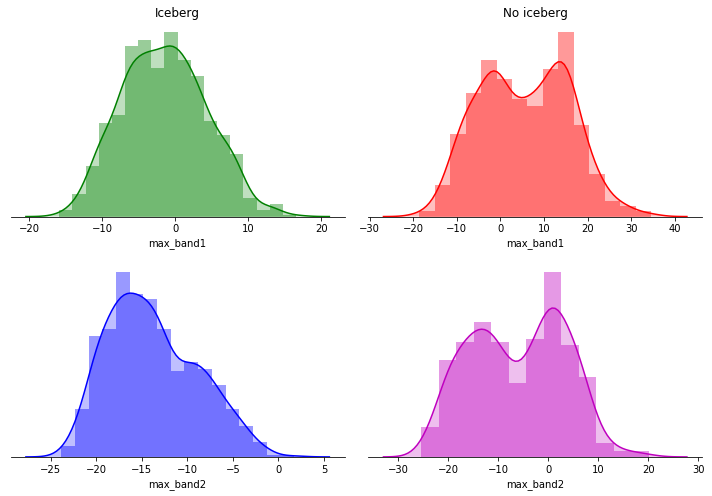

In [15]:
f, axes = plt.subplots(2, 2, figsize=(10, 7))
sns.despine(left=True)

sns.distplot(iceberg_df['max_band1'], kde=True, color="g", kde_kws={"shade": True}, ax=axes[0, 0])
sns.distplot(iceberg_df['max_band2'], kde=True, color="b", kde_kws={"shade": True}, ax=axes[1, 0])
sns.distplot(no_iceberg_df['max_band1'], kde=True, color="r", kde_kws={"shade": True}, ax=axes[0, 1])
sns.distplot(no_iceberg_df['max_band2'], kde=True, color="m", kde_kws={"shade": True}, ax=axes[1, 1])

axes[0,0].set_title('Iceberg')
axes[0,1].set_title('No iceberg')

plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

### Aaand the sums... 

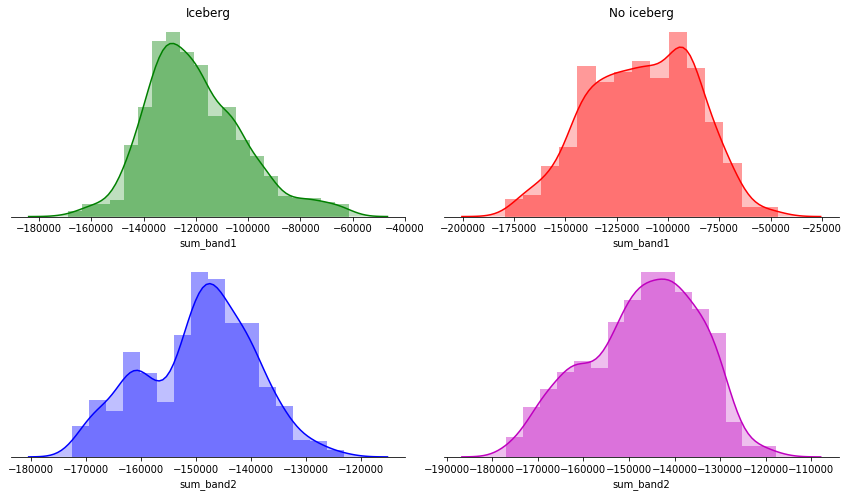

In [16]:
f, axes = plt.subplots(2, 2, figsize=(12, 7))
sns.despine(left=True)

sns.distplot(iceberg_df['sum_band1'], kde=True, color="g", kde_kws={"shade": True}, ax=axes[0, 0])
sns.distplot(iceberg_df['sum_band2'], kde=True, color="b", kde_kws={"shade": True}, ax=axes[1, 0])
sns.distplot(no_iceberg_df['sum_band1'], kde=True, color="r", kde_kws={"shade": True}, ax=axes[0, 1])
sns.distplot(no_iceberg_df['sum_band2'], kde=True, color="m", kde_kws={"shade": True}, ax=axes[1, 1])

axes[0,0].set_title('Iceberg')
axes[0,1].set_title('No iceberg')

plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

## Visualize correlation between inclination angle and the sum of bands

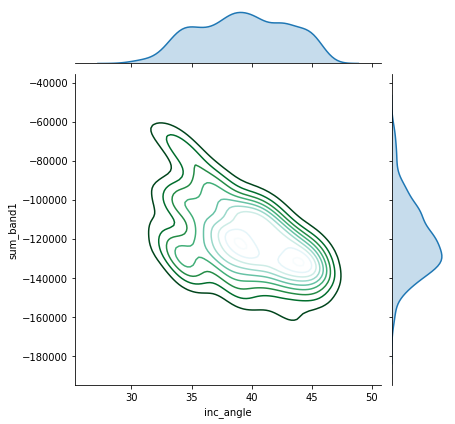

In [20]:
stack_band1 = np.stack([iceberg_df['inc_angle'], iceberg_df['sum_band1']], axis=-1)
df_band1 = pd.DataFrame(stack_band1, columns=['inc_angle', 'sum_band1'])

g = sns.JointGrid(x="inc_angle", y="sum_band1", data=df_band1)
g = g.plot_joint(sns.kdeplot, cmap="BuGn_r")
g = g.plot_marginals(sns.kdeplot, shade=True)

plt.show()

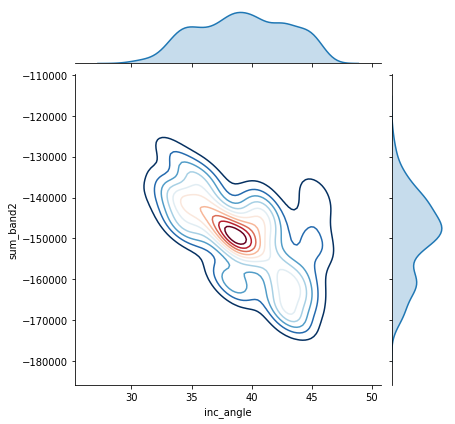

In [8]:
stack_band2 = np.stack([iceberg_df['inc_angle'], iceberg_df['sum_band2']], axis=-1)
df_band2 = pd.DataFrame(stack_band2, columns=['inc_angle', 'sum_band2'])

h = sns.JointGrid(x="inc_angle", y="sum_band2", data=df_band2)
h = h.plot_joint(sns.kdeplot, cmap="RdBu_r")
h = h.plot_marginals(sns.kdeplot, shade=True)

plt.show()